# **GridWorld** est une grille de 5x5 cases (5 lignes de 5 colonnes) sur laquelle un agent peut se déplacer. L'agent commence généralement dans la première case de la grille (première ligne, première colonne). Il a quatre actions possibles à sa disposition :
- **Gauche** : se déplacer vers la gauche.
- **Droite** : se déplacer vers la droite.
- **Haut** : se déplacer vers le haut.
- **Bas** : se déplacer vers le bas.

**Conditions terminales et récompenses :**
- Atteindre la dernière case de la première ligne (position [0, 4]) est un état terminal et donne une récompense de -3.
- Atteindre la dernière case de la dernière ligne (position [4, 4]) est également un état terminal, mais avec une récompense de 1.
- Essayer de se déplacer en dehors des bords de la grille entraîne un état terminal avec une récompense de -1.

In [37]:
import numpy as np
from typing import List, Tuple
from tqdm import tqdm

# Classe GridWorld

In [38]:
from grid import GridWorld

# Exemple de partie manuelle

In [39]:
grid = GridWorld()

grid.display()

X _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 


In [40]:
grid.step(1)
grid.display()

_ X _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 


In [41]:
grid.step(3)
grid.display()

_ _ _ _ _ 
_ X _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 


In [42]:
grid.step(3)
grid.display()

_ _ _ _ _ 
_ _ _ _ _ 
_ X _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 


In [43]:
grid.step(1)
grid.step(1)
grid.display()

_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ X _ 
_ _ _ _ _ 
_ _ _ _ _ 


In [44]:
grid.step(3)
grid.step(3)
grid.display()

_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ X _ 


In [45]:
grid.step(1)
grid.display()
grid.score()

_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ X 


1.0

In [46]:
def plot_policy(Q):
    action_symbols = ['←', '→', '↑', '↓']
    fig, ax = plt.subplots(5, 5, figsize=(12, 12))
    for row in range(5):
        for col in range(5):
            state = (col, row)
            best_action = np.argmax(Q[state])
            ax[row, col].text(0.5, 0.5, action_symbols[best_action], fontsize=18, ha='center', va='center')
            ax[row, col].set_xticks([])
            ax[row, col].set_yticks([])
            ax[row, col].set_frame_on(False)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

# Algorithme Naïf Q-learning

L'algorithme naïf de Q-learning est une méthode d'apprentissage par renforcement sans modèle qui cherche à apprendre la politique optimale pour un agent en explorant et en exploitant un environnement. Cet algorithme utilise une table de valeurs Q pour stocker et mettre à jour les estimations des récompenses futures attendues pour chaque paire état-action. Voici les étapes clés de cet algorithme :

1. **Initialisation** : La table Q est initialement remplie de valeurs arbitraires, et ces valeurs sont progressivement ajustées à travers les épisodes d'apprentissage.

2. **Choix des actions** : À chaque étape, l'agent choisit une action basée soit sur l'exploration (choix aléatoire) pour découvrir de nouvelles stratégies, soit sur l'exploitation (choisir l'action avec la valeur Q la plus élevée pour l'état actuel) pour maximiser les récompenses.

3. **Mise à jour de Q** : Après avoir pris une action, l'agent observe la récompense obtenue et le nouvel état atteint. La valeur Q pour la paire état-action est ensuite mise à jour en utilisant la formule :
   \[
   Q(s, a) = Q(s, a) + \alpha \left[r + \gamma \max_{a'} Q(s', a') - Q(s, a)\right]
   \]
   où \( \alpha \) est le taux d'apprentissage, \( \gamma \) est le facteur de dépréciation, \( r \) est la récompense observée, \( s' \) est le nouvel état, et \( a' \) est la meilleure action possible dans le nouvel état.

4. **Répétition** : Ces étapes sont répétées pour de nombreux épisodes jusqu'à ce que la table Q converge vers une approximation de la fonction de valeur optimale, permettant à l'agent de suivre la politique optimale déduite de Q.

L'algorithme de Q-learning est particulièrement utile pour les problèmes avec un espace d'état et d'action discrets et peut être appliqué à une variété de tâches d'apprentissage et de décision.


100%|██████████| 100000/100000 [00:06<00:00, 14410.54it/s]


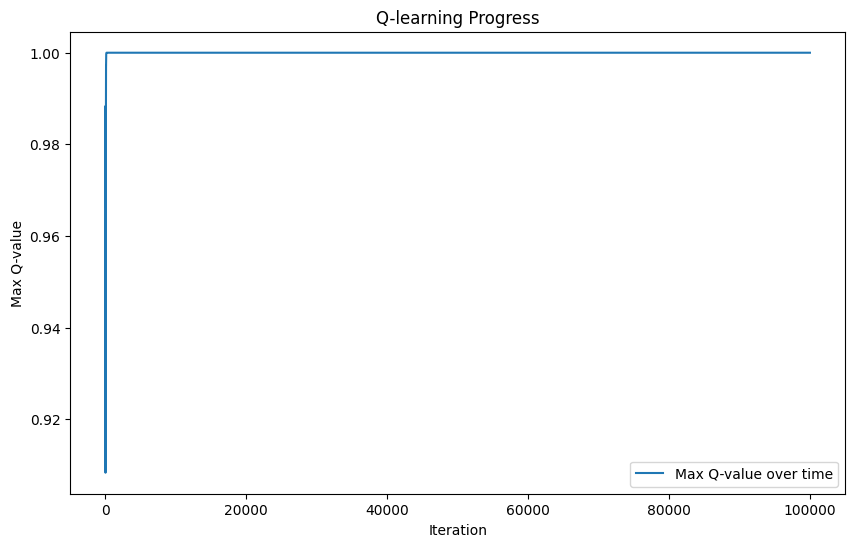

{(0, 0): {1: 0.9930209650349772, 3: 0.9930209650349772}, (0, 1): {1: 0.994014980014992, 2: 0.9920279440699417, 3: 0.9940149361164154}, (1, 0): {0: 0.9920279440699417, 1: 0.994014980014992, 3: 0.994014980014992}, (1, 1): {0: 0.993020957022347, 1: 0.9950099783266252, 2: 0.9930209650349772, 3: 0.9950099900049977}, (0, 2): {1: 0.9950099900049592, 2: 0.7804752037287069, 3: 0.7294112503508876}, (1, 2): {0: 0.9940147937458025, 1: 0.9960059960009989, 2: 0.994014959028811, 3: 0.9940147982428771}, (2, 2): {0: 0.9950099869440158, 1: 0.9970029989999992, 2: 0.9950099898876643, 3: 0.9970029980004692}, (2, 1): {0: 0.9940149206264557, 1: 0.9960059960009989, 2: 0.994014980014992, 3: 0.9960059960009989}, (3, 1): {0: 0.9950099900049977, 1: 0.9970029989999992, 2: 0.9950099900049977, 3: 0.9970029989999992}, (3, 2): {0: 0.9960059960009989, 1: 0.9980009999999991, 2: 0.9960059960009989, 3: 0.9980009999999991}, (2, 0): {0: 0.9930209650349772, 1: 0.9950099900049977, 3: 0.9950099900049977}, (3, 3): {0: 0.9970029

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def naive_q_learning_gridworld(env_type, alpha: float = 0.1, epsilon: float = 0.1, gamma: float = 0.999, nb_iter: int = 100000):
    Q = {}
    max_Q_values = []

    env = env_type()
    for it in tqdm(range(nb_iter)):
        env.reset()

        while not env.is_game_over():
            s = env.state_id()
            aa = env.available_actions()

            if s not in Q:
                Q[s] = {}
                for a in aa:
                    Q[s][a] = np.random.random()  # Initialize Q-values for each state-action pair

            # Decide whether to explore or exploit
            if np.random.random() < epsilon:
                a = np.random.choice(aa)
            else:
                # Choose the best action based on current Q-values
                q_s = [Q[s][a] for a in aa]
                best_a_index = np.argmax(q_s)
                a = aa[best_a_index]

            prev_score = env.score()
            env.step(a)
            r = env.score() - prev_score

            s_p = env.state_id()
            aa_p = env.available_actions()

            if env.is_game_over():
                target = r
            else:
                if s_p not in Q:
                    Q[s_p] = {}
                    for a_p in aa_p:
                        Q[s_p][a_p] = np.random.random()
                q_s_p = [Q[s_p][a_p] for a_p in aa_p]
                max_a_p = np.max(q_s_p)
                target = r + gamma * max_a_p

            Q[s][a] = (1 - alpha) * Q[s][a] + alpha * target

        # Track the maximum Q-value
        max_Q = max([max(actions.values()) for actions in Q.values()])
        max_Q_values.append(max_Q)

    # Extract policy from Q-values
    Pi = {}
    for s, actions in Q.items():
        best_a = max(actions, key=actions.get)
        Pi[s] = best_a

    # Plot the evolution of the maximum Q-value
    plt.figure(figsize=(10, 6))
    plt.plot(max_Q_values, label='Max Q-value over time')
    plt.xlabel('Iteration')
    plt.ylabel('Max Q-value')
    plt.title('Q-learning Progress')
    plt.legend()
    plt.show()

    return Pi, Q


def print_maxQ(q):
    policy_arrows = {
        0: '←',  # Gauche
        1: '→',  # Droite
        2: '↑',  # Haut
        3: '↓'   # Bas
    }

    # Déterminez la taille de la grille à partir des clés de l'état
    all_states = list(q.keys())
    max_row = max(state[0] for state in all_states)
    max_col = max(state[1] for state in all_states)
    grid_size = (max_row + 1, max_col + 1)

    # Initialisez une grille vide
    grid = np.full(grid_size, ' ')
    for state, actions in q.items():
        best_action = max(actions, key=actions.get)
        row, col = state
        grid[row, col] = policy_arrows[best_action]

    for row in grid:
        print(' '.join(row))

# Exemple d'utilisation:
Pi, Q = naive_q_learning_gridworld(GridWorld, nb_iter=100000)
print(Q) 
print_maxQ(Q)



# Algorithme Monte Carlo avec départs exploratoires (ES)

L'algorithme de Monte Carlo avec départs exploratoires (ES) est une technique d'apprentissage par renforcement qui permet d'estimer la politique optimale en utilisant l'échantillonnage complet des retours (gains cumulés) de chaque épisode. Contrairement aux méthodes basées sur le temps différé comme Q-learning, les méthodes Monte Carlo ajustent les estimations de la politique uniquement à la fin de chaque épisode. Voici les étapes principales de cet algorithme :

1. **Initialisation** : La politique (Pi) et la table de valeurs Q sont initialisées. Pour chaque état, une action est choisie aléatoirement comme action par défaut. Un dictionnaire de retours est également initialisé pour stocker les retours accumulés pour chaque paire état-action.

2. **Départs exploratoires** : Chaque épisode commence dans un état initial choisi aléatoirement avec une action également choisie aléatoirement. Cela assure que toutes les paires état-action ont une chance d'être explorées suffisamment.

3. **Génération de l'épisode** : L'agent suit la politique actuelle sauf pour le premier choix qui est aléatoire. L'épisode est enregistré sous forme de séquence de triplets (état, action, récompense).

4. **Calcul du retour** : À la fin de l'épisode, le retour pour chaque étape est calculé en remontant depuis la fin de l'épisode jusqu'au début, en utilisant le facteur de dépréciation \( \gamma \). Le retour est le gain cumulé à partir de cette étape jusqu'à la fin de l'épisode.

5. **Mise à jour de Q et de la politique** :
   - **Mise à jour de Q** : Pour chaque paire état-action unique rencontrée dans l'épisode, le retour est ajouté à la liste des retours correspondants et la valeur Q est mise à jour comme la moyenne de ces retours.
   - **Mise à jour de la politique** : Pour chaque état visité, la politique est mise à jour pour choisir l'action qui maximise la valeur Q estimée pour cet état.

6. **Répétition** : Le processus est répété pour un grand nombre d'épisodes pour permettre à la politique de converger vers la politique optimale.

Cet algorithme est particulièrement utile dans les environnements avec des dynamiques simples où la méthode des départs exploratoires est faisable. Il est aussi bien adapté aux situations où il est possible de simuler l'environnement pour générer des épisodes avec des conditions de départ arbitraires.


100%|██████████| 10000/10000 [00:17<00:00, 576.82it/s]


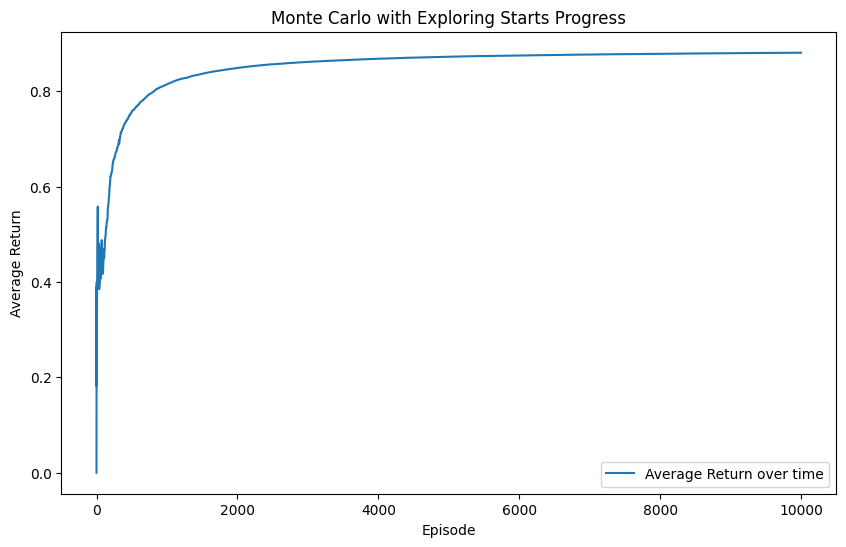

{(1, 1): 0, (1, 0): 1, (0, 0): 3, (0, 1): 3, (2, 4): 1, (3, 4): 1, (2, 1): 3, (2, 0): 3, (3, 0): 3, (2, 2): 3, (2, 3): 3, (4, 3): 3, (4, 2): 2, (3, 2): 0, (3, 1): 3, (3, 3): 3, (4, 1): 0, (0, 4): 1, (0, 3): 3, (1, 4): 1, (0, 2): 3, (1, 3): 3, (1, 2): 1}
↓ ↓ ↓ ↓ →
→ ← → ↓ →
↓ ↓ ↓ ↓ →
↓ ↓ ← ↓ →
← ↑ ↓


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def naive_monte_carlo_with_exploring_starts(env_type, gamma=0.999, nb_iter=10000, max_steps=10):
    Pi = {}
    Q = {}
    Returns = {}
    avg_returns = []

    for it in tqdm(range(nb_iter)):
        env = env_type.from_random_state()  # Assurez-vous que cette méthode initialise correctement

        is_first_action = True
        trajectory = []
        steps_count = 0
        while not env.is_game_over() and steps_count < max_steps:
            s = env.state_id()
            aa = env.available_actions()

            if s not in Pi:
                Pi[s] = np.random.choice(aa)

            if is_first_action:
                a = np.random.choice(aa)
                is_first_action = False
            else:
                a = Pi[s]

            prev_score = env.score()
            env.step(a)
            r = env.score() - prev_score

            trajectory.append((s, a, r, aa))
            steps_count += 1

        G = 0
        for (t, (s, a, r, aa)) in reversed(list(enumerate(trajectory))):
            G = gamma * G + r

            if all(map(lambda triplet: triplet[0] != s or triplet[1] != a, trajectory[:t])):
                if (s, a) not in Returns:
                    Returns[(s, a)] = []
                Returns[(s, a)].append(G)
                Q[(s, a)] = np.mean(Returns[(s, a)])

                best_a = None
                best_a_score = 0.0
                for a in aa:
                    if (s, a) not in Q:
                        Q[(s, a)] = np.random.random()
                    if best_a is None or Q[(s, a)] > best_a_score:
                        best_a = a
                        best_a_score = Q[(s, a)]

                Pi[s] = best_a

        # Calculate the average return for visualization
        avg_return = np.mean([np.mean(ret) for ret in Returns.values()])
        avg_returns.append(avg_return)

    # Plot the average return over time
    plt.figure(figsize=(10, 6))
    plt.plot(avg_returns, label='Average Return over time')
    plt.xlabel('Episode')
    plt.ylabel('Average Return')
    plt.title('Monte Carlo with Exploring Starts Progress')
    plt.legend()
    plt.show()

    return Pi


def print_policy(policy, grid_size):
    policy_arrows = {
        0: '←',  # Gauche
        1: '→',  # Droite
        2: '↑',  # Haut
        3: '↓'   # Bas
    }

    grid = np.full(grid_size, ' ')
    for (state, action) in policy.items():
        row, col = state
        grid[row, col] = policy_arrows[action]

    for row in grid:
        row_str = ' '.join(row).strip()
        if row_str:
            print(row_str)





Pi = naive_monte_carlo_with_exploring_starts(GridWorld, nb_iter=10000)
print(Pi)
print_policy(Pi, (5, 5))



# Algorithme On-policy First visit Monte Carlo control

100%|██████████| 10000/10000 [00:13<00:00, 725.67it/s]


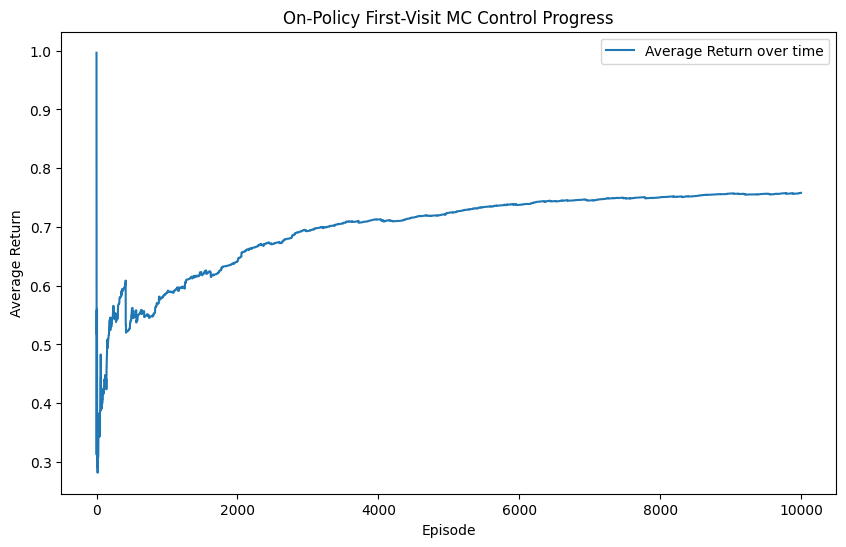

{(3, 4): 1, (2, 4): 1, (2, 3): 3, (1, 3): 1, (2, 2): 3, (3, 2): 1, (0, 3): 3, (0, 2): 1, (0, 1): 1, (0, 0): 3, (1, 0): 3, (2, 1): 1, (1, 1): 3, (1, 2): 3, (3, 1): 3, (1, 4): 1, (0, 4): 1, (3, 3): 1, (3, 0): 3, (4, 1): 3, (4, 3): 3, (4, 2): 3, (2, 0): 3}
↓ → → ↓ →
↓ ↓ ↓ → →
↓ → ↓ ↓ →
↓ ↓ → → →
↓ ↓ ↓


In [ ]:
from collections import defaultdict
def on_policy_first_visit_mc_control(env_type, gamma=0.999, epsilon=0.1, nb_iter=10000, max_steps=10):
    Pi = {}
    Q = defaultdict(lambda: 0.0)
    Returns = defaultdict(list)
    avg_returns = []

    for it in tqdm(range(nb_iter)):
        env = env_type.from_random_state()
        trajectory = []
        steps_count = 0

        while not env.is_game_over() and steps_count < max_steps:
            s = env.state_id()
            aa = env.available_actions()

            if np.random.random() < epsilon or s not in Pi:
                a = np.random.choice(aa)
            else:
                a = Pi[s]

            prev_score = env.score()
            env.step(a)
            r = env.score() - prev_score

            trajectory.append((s, a, r, aa))
            steps_count += 1

        G = 0
        visited_state_action_pairs = set()
        for (s, a, r, aa) in reversed(trajectory):
            G = gamma * G + r

            if (s, a) not in visited_state_action_pairs:
                visited_state_action_pairs.add((s, a))
                Returns[(s, a)].append(G)
                Q[(s, a)] = np.mean(Returns[(s, a)])

                best_a = max(aa, key=lambda action: Q[(s, action)])
                Pi[s] = best_a

        # Calculate the average return for visualization
        avg_return = np.mean([np.mean(ret) for ret in Returns.values()])
        avg_returns.append(avg_return)

    # Plot the average return over time
    plt.figure(figsize=(10, 6))
    plt.plot(avg_returns, label='Average Return over time')
    plt.xlabel('Episode')
    plt.ylabel('Average Return')
    plt.title('On-Policy First-Visit MC Control Progress')
    plt.legend()
    plt.show()

    return Pi


grid_size = (5, 5)
pi = on_policy_first_visit_mc_control(GridWorld, nb_iter=10000)
print(pi)
print_policy(pi, grid_size)


# Off Policy First visit Monte Carlo Control

  0%|          | 0/10000 [00:00<?, ?it/s]/home/alexblch/miniconda3/envs/tf-gpu/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/alexblch/miniconda3/envs/tf-gpu/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 10000/10000 [00:00<00:00, 16862.04it/s]


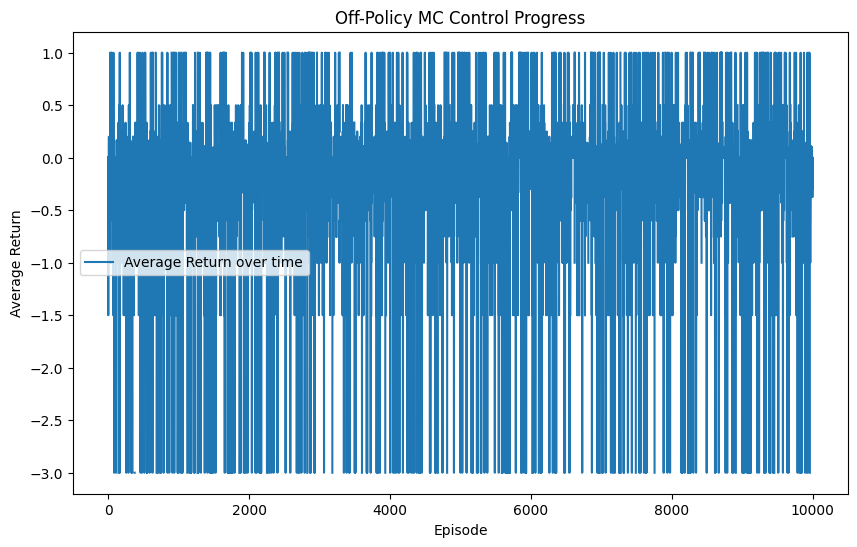

{(1, 4): 0,
 (2, 2): 0,
 (4, 1): 0,
 (0, 4): 1,
 (0, 3): 0,
 (1, 2): 0,
 (1, 0): 1,
 (2, 1): 0,
 (3, 3): 0,
 (3, 4): 0,
 (3, 0): 0,
 (1, 1): 0,
 (0, 0): 1,
 (0, 2): 1,
 (2, 3): 0,
 (2, 4): 0,
 (4, 3): 0,
 (2, 0): 0,
 (1, 3): 0,
 (3, 2): 0,
 (4, 2): 0,
 (0, 1): 0,
 (3, 1): 0}

In [ ]:
def off_policy_mc_control(env_type, gamma=0.999, nb_iter=10000, max_steps=10):
    Q = defaultdict(lambda: 0.0)
    C = defaultdict(lambda: 0.0)
    b = defaultdict(lambda: 1.0)  # behavior policy (random)
    Pi = {}
    avg_returns = []

    for it in tqdm(range(nb_iter)):
        env = env_type.from_random_state()
        trajectory = []
        steps_count = 0

        while not env.is_game_over() and steps_count < max_steps:
            s = env.state_id()
            aa = env.available_actions()

            a = np.random.choice(aa)
            prev_score = env.score()
            env.step(a)
            r = env.score() - prev_score

            trajectory.append((s, a, r))
            steps_count += 1

        G = 0
        W = 1.0
        for (s, a, r) in reversed(trajectory):
            G = gamma * G + r
            C[(s, a)] += W
            Q[(s, a)] += (W / C[(s, a)]) * (G - Q[(s, a)])
            
            Pi[s] = max(env.available_actions(), key=lambda action: Q[(s, action)])
            
            if a != Pi[s]:
                break
            
            W *= 1.0 / b[(s, a)]

        # Calculate the average return for visualization
        avg_return = np.mean([G for _, _, G in trajectory])
        avg_returns.append(avg_return)

    # Plot the average return over time
    plt.figure(figsize=(10, 6))
    plt.plot(avg_returns, label='Average Return over time')
    plt.xlabel('Episode')
    plt.ylabel('Average Return')
    plt.title('Off-Policy MC Control Progress')
    plt.legend()
    plt.show()

    return Pi

pi = off_policy_mc_control(GridWorld, nb_iter=10000)
pi

In [ ]:
print_policy(pi, grid_size)

→ ← → ← →
→ ← ← ← ←
← ← ← ← ←
← ← ← ← ←
← ← ←


# Sarsa

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import random


def build_model(state_size, action_size):
    model = Sequential()
    model.add(Dense(24, input_dim=state_size, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(action_size, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
    return model

def sarsa(env, num_episodes, alpha, gamma, epsilon):
    state_size = env.length()[0] * env.length()[1]
    action_size = 4  # 4 possible actions: left, right, up, down
    model = build_model(state_size, action_size)

    for episode in range(num_episodes):
        env.reset()
        state = env.state_id()
        state_index = state[0] * 5 + state[1]
        done = False

        state_one_hot = np.eye(state_size)[state_index:state_index + 1]
        if state_one_hot.shape[0] == 0 or state_one_hot.shape[1] == 0:
            continue  # Skip invalid state

        action = np.random.choice(env.available_actions()) if np.random.rand() < epsilon else np.argmax(model.predict(state_one_hot)[0])

        while not done:
            env.step(action)
            reward = env.score()
            next_state = env.state_id()
            next_state_index = next_state[0] * 5 + next_state[1]
            next_state_one_hot = np.eye(state_size)[next_state_index:next_state_index + 1]
            if next_state_one_hot.shape[0] == 0 or next_state_one_hot.shape[1] == 0:
                break  # Break on invalid next state

            done = env.is_game_over()

            next_action = np.random.choice(env.available_actions()) if np.random.rand() < epsilon else np.argmax(model.predict(next_state_one_hot)[0])

            target = reward + gamma * model.predict(next_state_one_hot)[0][next_action] if not done else reward
            target_f = model.predict(state_one_hot)
            target_f[0][action] = (1 - alpha) * target_f[0][action] + alpha * target

            model.fit(state_one_hot, target_f, epochs=1, verbose=0)

            state = next_state
            state_one_hot = next_state_one_hot
            action = next_action

    return model

# Parameters for SARSA
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 100  # Number of episodes

# Create the environment and run the SARSA algorithm
env = GridWorld()
model = sarsa(env, num_episodes, alpha, gamma, epsilon)

# Display the optimal policy found
action_symbols = ['←', '→', '↑', '↓']
state_size = env.length()[0] * env.length()[1]
Q = np.zeros((state_size, 4))

# Populate Q with the trained model predictions
for row in range(5):
    for col in range(5):
        state_index = col * 5 + row
        state_one_hot = np.eye(state_size)[state_index:state_index + 1]
        if state_one_hot.shape[0] > 0 and state_one_hot.shape[1] > 0:
            Q[state_index] = model.predict(state_one_hot)[0]

# Display the optimal policy
for row in range(5):
    for col in range(5):
        state_index = col * 5 + row
        best_action = np.argmax(Q[state_index])
        print(action_symbols[best_action], end=' ')
    print()



→ → ↓ ↓ ↓ 
↓ ↓ ↓ → ↓ 
↓ → ↓ → → 
→ → → ↓ → 
↓ → → → → 


# Dyna Q

State (0, 0): [0.0, 0.9303142884320805, 0.0, 0.9293138155483353]
State (1, 0): [0.9209160903851922, 0.9394828187013208, 0.0, 0.9398905957340162]
State (2, 0): [0.930433110701985, 0.9490794843553404, 0.0, 0.9493304696912676]
State (3, 0): [0.9396568030703543, -2.9999999999999982, 0.0, 0.9588336083515776]
State (4, 0): [0.0, 0.0, 0.0, 0.0]
State (0, 1): [0.0, 0.9390246251645376, 0.9209882626237507, 0.9393775833276712]
State (1, 1): [0.9302014019533953, 0.9493848984994566, 0.9304480932480989, 0.9490193822211245]
State (2, 1): [0.9398636881244327, 0.9589515472860024, 0.9395515216460903, 0.9588159652937175]
State (3, 1): [0.9492862095847698, 0.9684369273649645, 0.9488851236904028, 0.9691308174486016]
State (4, 1): [0.958899184952875, 0.0, -2.9999999999999982, 0.9794615689036872]
State (0, 2): [0.0, 0.9489237638450136, 0.9301601119772016, 0.9476308640179795]
State (1, 2): [0.9396483084974324, 0.9589661749479004, 0.939809728792431, 0.9573061050886817]
State (2, 2): [0.9491663570059774, 0.9686

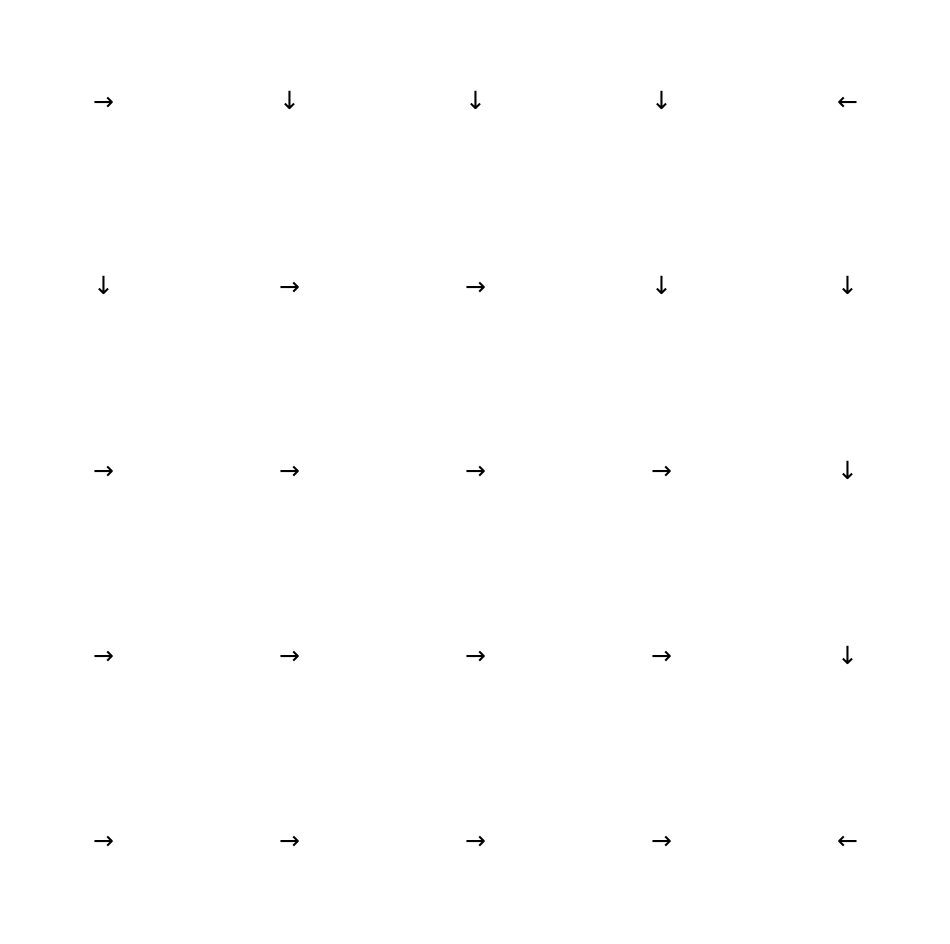

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy_policy(Q, state, epsilon, available_actions):
    if not available_actions:
        return random.choice([0, 1, 2, 3])
    if random.uniform(0, 1) < epsilon:
        return random.choice(available_actions)
    else:
        if available_actions:
            return max(available_actions, key=lambda x: Q[state][x])
        else:
            return random.choice([0, 1, 2, 3])

def dyna_q(env, num_episodes, alpha, gamma, epsilon, planning_steps):
    Q = {}
    model = {}

    for row in range(5):
        for col in range(5):
            Q[(col, row)] = [0.0, 0.0, 0.0, 0.0]
            model[(col, row)] = {}

    for episode in range(num_episodes):
        env.reset()
        state = env.state_id()
        available_actions = env.available_actions()
        action = epsilon_greedy_policy(Q, state, epsilon, available_actions)

        while not env.is_game_over():
            env.step(action)
            reward = env.score()
            next_state = env.state_id()
            next_available_actions = env.available_actions()
            next_action = epsilon_greedy_policy(Q, next_state, epsilon, next_available_actions)

            # Update Q
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])

            # Update model
            model[state][action] = (reward, next_state)

            # Planning
            for _ in range(planning_steps):
                sampled_state = random.choice(list(model.keys()))
                if not model[sampled_state]:
                    continue
                sampled_action = random.choice(list(model[sampled_state].keys()))
                sampled_reward, sampled_next_state = model[sampled_state][sampled_action]

                Q[sampled_state][sampled_action] += alpha * (sampled_reward + gamma * max(Q[sampled_next_state]) - Q[sampled_state][sampled_action])

            state = next_state
            action = next_action

    return Q

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 1000  # Number of episodes
planning_steps = 5  # Number of planning steps

# Create the environment and run the Dyna-Q algorithm
env = GridWorld()
Q = dyna_q(env, num_episodes, alpha, gamma, epsilon, planning_steps)

# Display the Q-values
for state, actions in Q.items():
    print(f"State {state}: {actions}")

# Plot the optimal policy found
plot_policy(Q)
